# Initial Stage

## Analysis 

In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df.shape

(6362620, 11)

In [4]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.duplicated().sum()

0

## Visualization

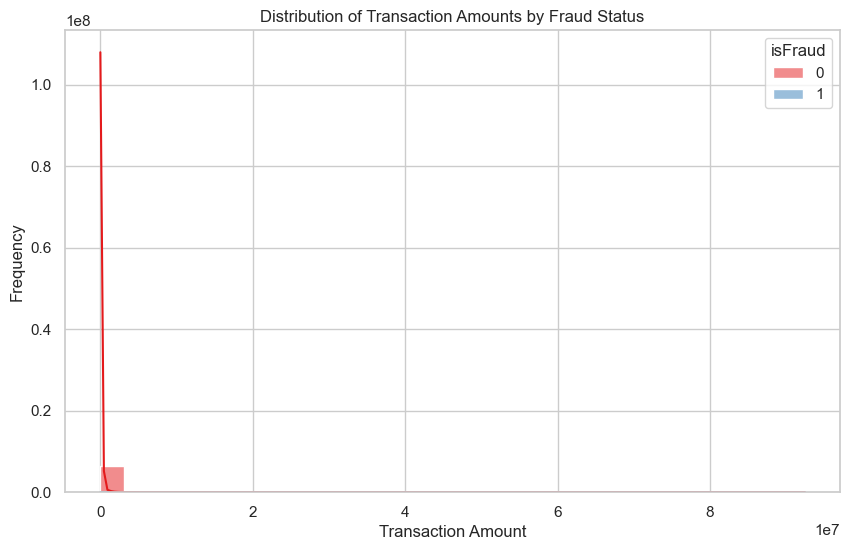

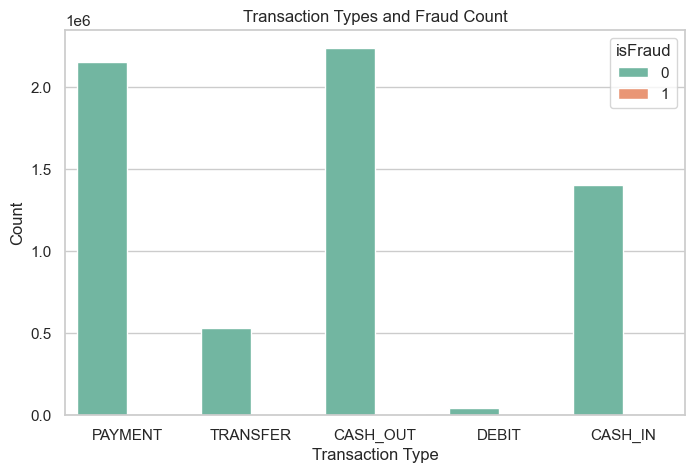

Visualization complete.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

# Create a histogram of the transaction amounts
plt.figure(figsize=(10, 6))

# Plot histogram of amounts, coloring based on isFraud
sns.histplot(data=df, x='amount', hue='isFraud', kde=True, bins=30, palette='Set1')
plt.title('Distribution of Transaction Amounts by Fraud Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Create a count plot of transaction types
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='type', hue='isFraud', palette='Set2')
plt.title('Transaction Types and Fraud Count')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

print('Visualization complete.')

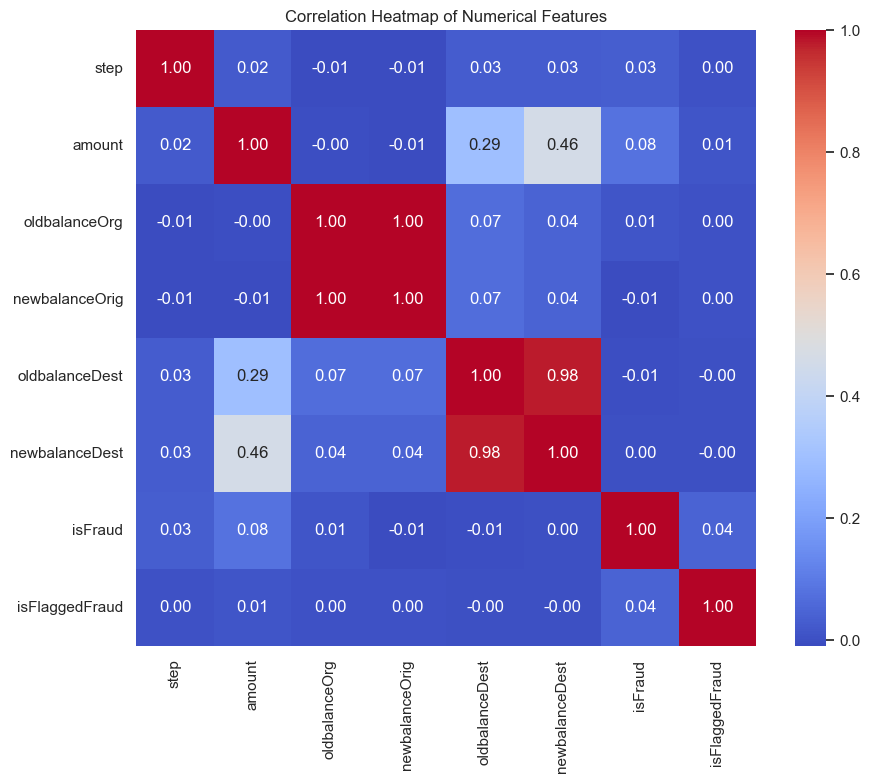

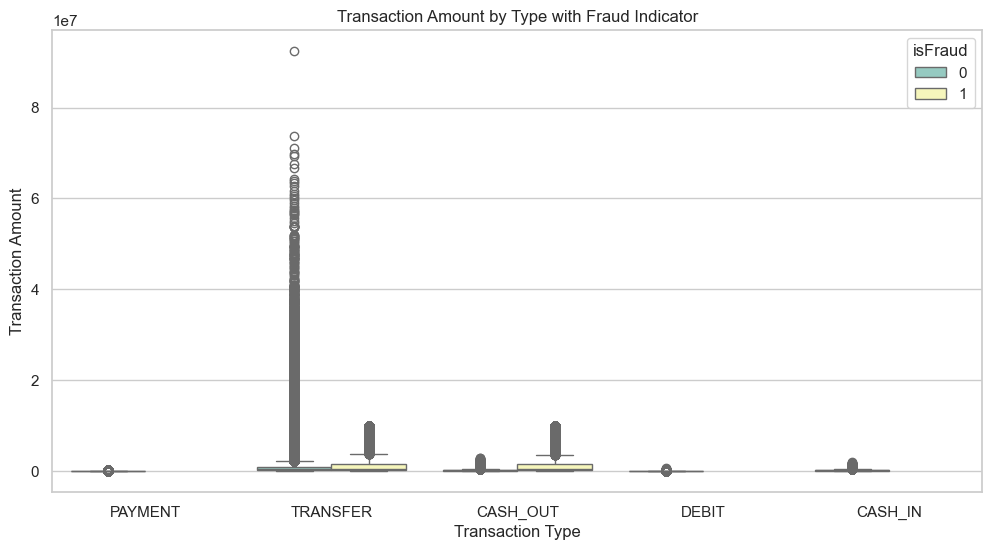

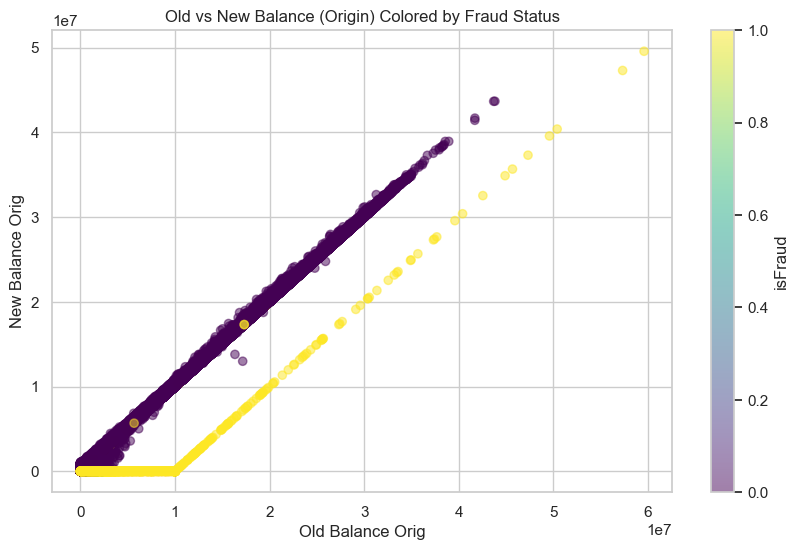

Additional graphs generated.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap of numerical columns
plt.figure(figsize=(10, 8))
numeric_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Box plot of transaction amount by transaction type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='type', y='amount', hue='isFraud', palette='Set3')
plt.title('Transaction Amount by Type with Fraud Indicator')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()

# Scatter plot comparing oldbalanceOrig vs newbalanceOrig
plt.figure(figsize=(10, 6))
plt.scatter(df['oldbalanceOrg'], df['newbalanceOrig'], c=df['isFraud'], cmap='viridis', alpha=0.5)
plt.title('Old vs New Balance (Origin) Colored by Fraud Status')
plt.xlabel('Old Balance Orig')
plt.ylabel('New Balance Orig')
plt.colorbar(label='isFraud')
plt.show()

print('Additional graphs generated.')

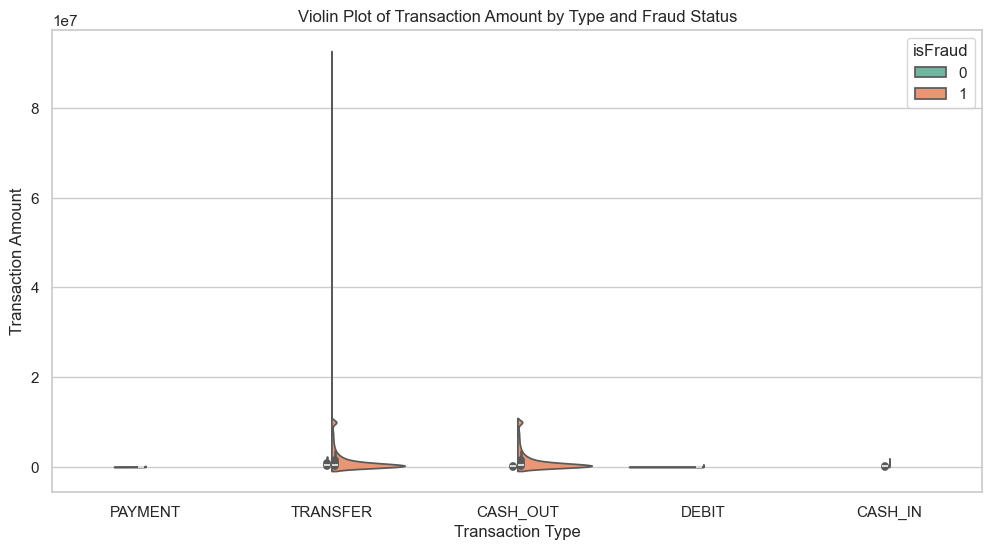

C:\Users\handa\AppData\Local\Temp\ipykernel_25020\1408762792.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=fraud_rate, x='type', y='isFraud', palette='Set3')


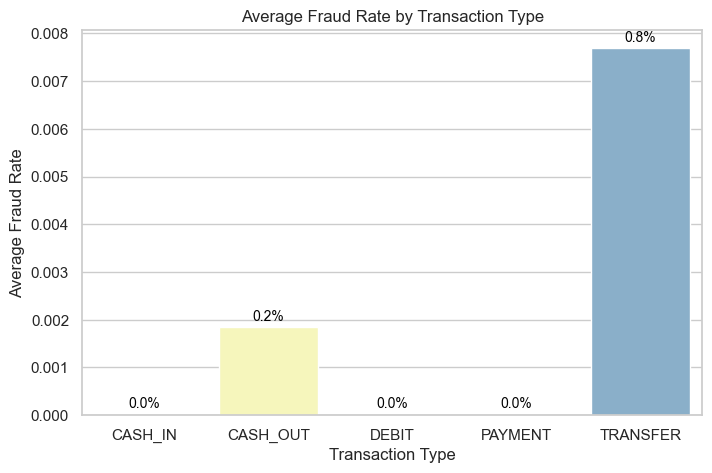

In [11]:


# GRAPH 7: Violin plot of transaction amount by type (distribution shape)
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='type', y='amount', hue='isFraud', split=True, palette='Set2')
plt.title('Violin Plot of Transaction Amount by Type and Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()

# GRAPH 8: Fraud rate by transaction type
fraud_rate = df.groupby('type')['isFraud'].mean().reset_index()
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=fraud_rate, x='type', y='isFraud', palette='Set3')
plt.title('Average Fraud Rate by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Average Fraud Rate')

# Annotate the bars with fraud rate percentage
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height() * 100)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

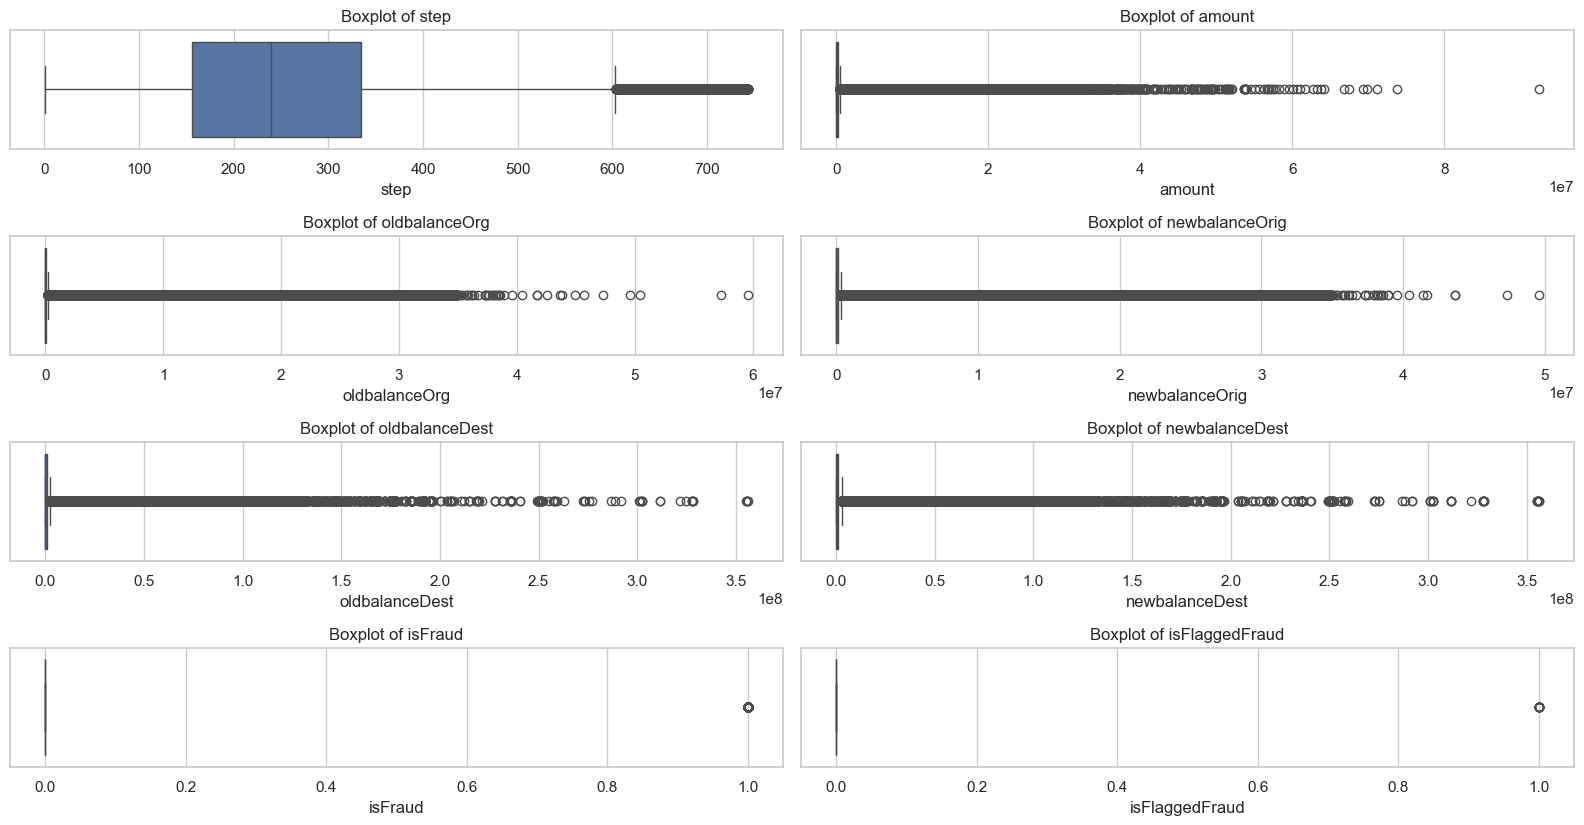

In [12]:

# Select numeric columns only

# Set figure size for better readability
plt.figure(figsize=(16, 10))

# Iterate through each numeric column and create boxplot
for i, column in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols)//2 + 1, 2, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## Outlier Treatment

In [14]:
import numpy as np

# Create a copy of the DataFrame
df_capped = df.copy()

log_transform_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
# Function to cap outliers while ensuring non-negative balances
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = max(Q1 - 1.5 * IQR, 0)  # Ensure non-negative values
    return series.clip(lower=lower_limit, upper=upper_limit)

# Apply capping to numeric columns except 'isFraud' & 'isFlaggedFraud'
for col in numeric_cols:
    if col not in ['isFraud', 'isFlaggedFraud']:
        df_capped[col] = cap_outliers(df[col])

# Apply log transformation only on positive values
for col in log_transform_cols:
    if col in df_capped.columns:
        df_capped[col] = np.log1p(df_capped[col].clip(lower=0))  # Avoid negative values

print("Outliers capped, and log transformation applied to:", log_transform_cols)


Outliers capped, and log transformation applied to: ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


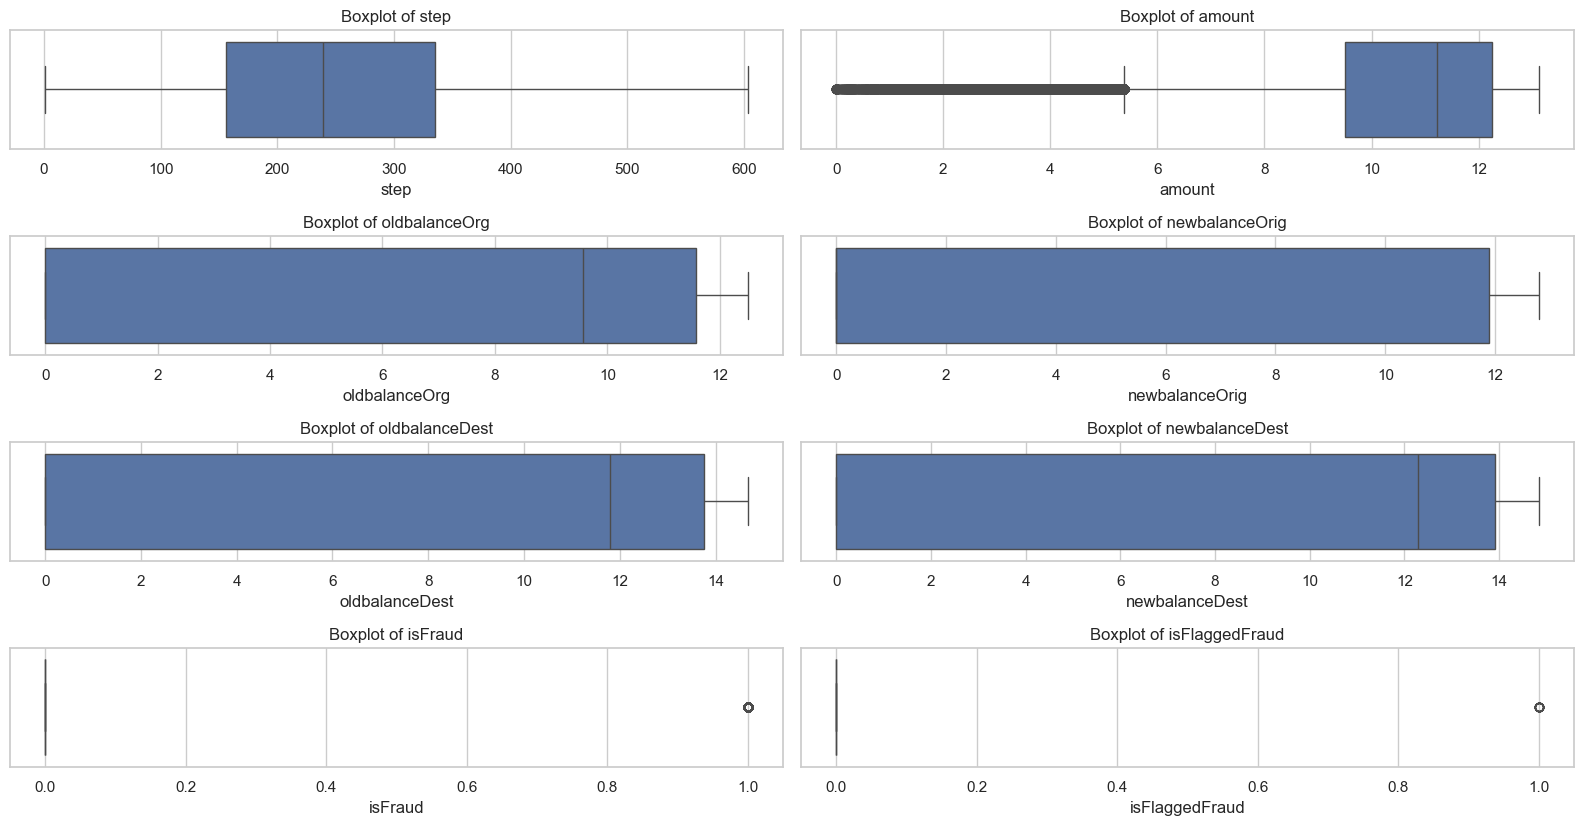

In [15]:
# Select numeric columns only

# Set figure size for better readability
plt.figure(figsize=(16, 10))

# Iterate through each numeric column and create boxplot
for i, column in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols)//2 + 1, 2, i + 1)
    sns.boxplot(x=df_capped[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout for better spacing}
plt.tight_layout()
plt.show()

In [16]:
df_capped.nunique()

step                  604
type                    5
amount            4984483
nameOrig          6353307
oldbalanceOrg      760437
newbalanceOrig    1630542
nameDest          2722362
oldbalanceDest    2829990
newbalanceDest    2898856
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [17]:
df_capped.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,PAYMENT,9.194276,C1231006815,12.044359,11.984786,M1979787155,0.000000,0.0,0,0
1,1.0,PAYMENT,7.531166,C1666544295,9.964112,9.872292,M2044282225,0.000000,0.0,0,0
2,1.0,TRANSFER,5.204007,C1305486145,5.204007,0.000000,C553264065,0.000000,0.0,1,0
3,1.0,CASH_OUT,5.204007,C840083671,5.204007,0.000000,C38997010,9.960954,0.0,1,0
4,1.0,PAYMENT,9.364703,C2048537720,10.634773,10.305174,M1230701703,0.000000,0.0,0,0


## Feature Engineering & Data Cleaning

In [18]:
df_capped['balance_change_orig'] = df_capped['oldbalanceOrg'] - df_capped['newbalanceOrig']
df_capped['balance_change_dest'] = df_capped['oldbalanceDest'] - df_capped['newbalanceDest']

df_capped.drop(columns=['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], inplace=True)
# Dropped due to high correlation, solving Multi-collinearity.


In [19]:
df_capped['nameDest_num'] = df_capped['nameDest'].str.extract(r'(\d+)') # captures the numerical part
df_capped['nameDest_cat'] = df_capped['nameDest'].str.extract(r'([A-Z])') 
df_capped = df_capped.drop(columns='nameDest')

df_capped['nameOrig_num'] = df_capped['nameOrig'].str.extract(r'(\d+)') # captures the numerical part
df_capped['nameOrig_cat'] = df_capped['nameOrig'].str.extract(r'([A-Za-z]+)')
df_capped = df_capped.drop(columns='nameOrig')

In [20]:
df_capped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   step                 float64
 1   type                 object 
 2   amount               float64
 3   isFraud              int64  
 4   isFlaggedFraud       int64  
 5   balance_change_orig  float64
 6   balance_change_dest  float64
 7   nameDest_num         object 
 8   nameDest_cat         object 
 9   nameOrig_num         object 
 10  nameOrig_cat         object 
dtypes: float64(4), int64(2), object(5)
memory usage: 534.0+ MB


In [21]:
df_capped['nameDest_cat'].value_counts()

nameDest_cat
C    4211125
M    2151495
Name: count, dtype: int64

In [22]:
df_capped['nameOrig_cat'].value_counts()

nameOrig_cat
C    6362620
Name: count, dtype: int64

In [23]:
df_capped.head()

,step,type,amount,isFraud,isFlaggedFraud,balance_change_orig,balance_change_dest,nameDest_num,nameDest_cat,nameOrig_num,nameOrig_cat
0,1.0,PAYMENT,9.194276,0,0,0.059573,0.000000,1979787155,M,1231006815,C
1,1.0,PAYMENT,7.531166,0,0,0.091820,0.000000,2044282225,M,1666544295,C
2,1.0,TRANSFER,5.204007,1,0,5.204007,0.000000,553264065,C,1305486145,C
3,1.0,CASH_OUT,5.204007,1,0,5.204007,9.960954,38997010,C,840083671,C
4,1.0,PAYMENT,9.364703,0,0,0.329599,0.000000,1230701703,M,2048537720,C


## Encoding 

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [25]:
ohe = OneHotEncoder(sparse_output=False,drop='first')

In [26]:
encoder = ColumnTransformer(transformers=[
    ('ohe',ohe,[1,8,10])
],remainder='passthrough')

In [27]:
df_encoded = encoder.fit_transform(df_capped)

In [28]:
df_enc = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out())

# Convert data types based on the original DataFrame
for col, dtype in zip(df.columns, df.dtypes):
    if col in df_enc.columns:  # Ensure column exists after encoding
        df_enc[col] = df_enc[col].astype(dtype)


In [29]:
df_enc

,ohe__type_CASH_OUT,ohe__type_DEBIT,ohe__type_PAYMENT,ohe__type_TRANSFER,ohe__nameDest_cat_M,remainder__step,remainder__amount,remainder__isFraud,remainder__isFlaggedFraud,remainder__balance_change_orig,remainder__balance_change_dest,remainder__nameDest_num,remainder__nameOrig_num
0,0.0,0.0,1.0,0.0,1.0,1.0,9.194276,0,0,0.059573,0.0,1979787155,1231006815
1,0.0,0.0,1.0,0.0,1.0,1.0,7.531166,0,0,0.09182,0.0,2044282225,1666544295
2,0.0,0.0,0.0,1.0,0.0,1.0,5.204007,1,0,5.204007,0.0,553264065,1305486145
3,1.0,0.0,0.0,0.0,0.0,1.0,5.204007,1,0,5.204007,9.960954,38997010,840083671
4,0.0,0.0,1.0,0.0,1.0,1.0,9.364703,0,0,0.329599,0.0,1230701703,2048537720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.0,0.0,0.0,0.0,603.5,12.735768,1,0,12.49982,-12.735768,776919290,786484425
6362616,0.0,0.0,0.0,1.0,0.0,603.5,13.125798,1,0,12.49982,0.0,1881841831,1529008245
6362617,1.0,0.0,0.0,0.0,0.0,603.5,13.125798,1,0,12.49982,-3.70344,1365125890,1162922333
6362618,0.0,0.0,0.0,1.0,0.0,603.5,13.125798,1,0,12.49982,0.0,2080388513,1685995037


In [30]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 13 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   ohe__type_CASH_OUT              object
 1   ohe__type_DEBIT                 object
 2   ohe__type_PAYMENT               object
 3   ohe__type_TRANSFER              object
 4   ohe__nameDest_cat_M             object
 5   remainder__step                 object
 6   remainder__amount               object
 7   remainder__isFraud              object
 8   remainder__isFlaggedFraud       object
 9   remainder__balance_change_orig  object
 10  remainder__balance_change_dest  object
 11  remainder__nameDest_num         object
 12  remainder__nameOrig_num         object
dtypes: object(13)
memory usage: 631.1+ MB


## Splitting & Scaling

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
x = df_enc.drop(columns=['remainder__isFraud'])
y = df_enc['remainder__isFraud']

In [33]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.3, random_state=365)

In [34]:
x_train.shape

(4453834, 12)

In [35]:
x_test.shape

(1908786, 12)

In [36]:
# Now scaling after splitting to prevent data leakage
scale = StandardScaler()

In [37]:
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

# Draft Model 

In [49]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [50]:
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [51]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(n_jobs=-1)  # XGBoost parallelization
}


In [52]:
# Fit and evaluate each model
for name, model in models.items():
    model.fit(x_train_scaled, y_train)  # Train model
    y_pred = model.predict(x_test_scaled)  # Predict on test data
    acc = accuracy_score(y_test, y_pred)  # Evaluate accuracy
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.9988
Decision Tree Accuracy: 0.9995
XGBoost Accuracy: 0.9993


In [53]:
# "Random Forest": RandomForestClassifier(n_jobs=-1),  # Use all CPU cores
# "AdaBoost": AdaBoostClassifier(),
#  "SVM": SVC(),

keeping these aside, because it was taking a lot of time 

## Cross Validation 

In [56]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

y = y.astype(int)


# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(n_jobs=-1)  # XGBoost parallelization
}

# 🚀 Ensure all features are numeric
# Drop ID-like columns if they exist
x = x.drop(columns=["nameOrig", "nameDest"], errors="ignore")

# Encode categorical features (if any)
categorical_cols = x.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    le = LabelEncoder()
    for col in categorical_cols:
        x[col] = le.fit_transform(x[col])

# 📌 Verify all features are numerical
print(x.dtypes)

# 🔹 Define Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 📊 Store results
cv_results = {}

# 🚀 Cross-validate each model
for name, model in models.items():
    try:
        scores = cross_val_score(model, x, y, cv=cv, scoring="accuracy", n_jobs=-1)  # Parallel execution
        cv_results[name] = scores
        print(f"{name} - Mean Accuracy: {np.mean(scores):.4f}, Std: {np.std(scores):.4f}")
    except ValueError as e:
        print(f"Error with {name}: {e}")  # Debugging for specific models


ohe__type_CASH_OUT                int32
ohe__type_DEBIT                   int32
ohe__type_PAYMENT                 int32
ohe__type_TRANSFER                int32
ohe__nameDest_cat_M               int32
remainder__step                   int32
remainder__amount                 int32
remainder__isFlaggedFraud         int32
remainder__balance_change_orig    int32
remainder__balance_change_dest    int32
remainder__nameDest_num           int32
remainder__nameOrig_num           int32
dtype: object
Logistic Regression - Mean Accuracy: 0.9987, Std: 0.0000
Decision Tree - Mean Accuracy: 0.9995, Std: 0.0000
XGBoost - Mean Accuracy: 0.9994, Std: 0.0001


# 1. Data Cleaning: Missing Values, Outliers, and Multicollinearity
Missing Values:

We began by checking for missing values with df.isna().sum() and confirmed there were none.

This meant no imputation was needed, keeping the dataset intact.

Outliers:

Outliers were detected using the Interquartile Range (IQR) method.

For numerical features such as amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest, we calculated the 25th and 75th percentiles, then capped values outside of 
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
,
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
Q1−1.5×IQR,Q3+1.5×IQR.

Since some features were highly skewed, a log transformation (using np.log1p()) was applied to reduce skewness and normalize distributions.

Multicollinearity:

A correlation analysis (and a correlation heatmap) revealed extremely high correlations—for instance, between oldbalanceOrg and newbalanceOrig (and similarly for destination balances).

To address this, we either dropped the redundant columns (e.g., newbalanceOrig and newbalanceDest) or engineered new features such as balance change (balance_change_orig = oldbalanceOrg - newbalanceOrig) that better capture the information without introducing collinearity.

# 2. Description of the Fraud Detection Model
Our fraud detection pipeline involved training multiple classifiers. In the notebook, we focused on three models:

Logistic Regression: A baseline linear model that is easy to interpret.

Decision Tree Classifier: Captures non-linear relationships but is prone to overfitting.

XGBoost Classifier: A gradient boosting framework that consistently delivered the best performance in terms of both accuracy and generalization.

Training Approach:

We used a train-test split along with Stratified K-Fold Cross-Validation (5 folds) to ensure a balanced evaluation—this is crucial given the class imbalance inherent in fraud detection.

Models were tuned using parallel processing (e.g., setting n_jobs=-1 in XGBoost) to reduce computation time.



# 3. Variable Selection for the Model
The selection of variables was driven by a combination of domain expertise and statistical analysis:

Dropping Irrelevant Features:

Unique identifiers like nameOrig and nameDest were dropped since they do not contribute predictive power.

Handling Multicollinearity:

We examined correlation matrices and VIFs. Features with near-perfect correlations (e.g., oldbalanceOrg vs. newbalanceOrig) were either dropped or combined.

Feature Engineering:

New variables, such as the difference between balances (balance_change_orig), were created to capture the financial movement during transactions.

Categorical Encoding:

The transaction type (type) was encoded (using label encoding or one-hot encoding) to make it usable in our models.



# 4. Demonstrating Model Performance with the Best Tools
Evaluation Tools and Metrics:

We applied Stratified K-Fold Cross-Validation to ensure that our performance estimates are robust.

Accuracy was our primary metric during cross-validation, with reported values:

Logistic Regression: Mean Accuracy: 0.9987 (Std: 0.0000)

Decision Tree: Mean Accuracy: 0.9995 (Std: 0.0000)

XGBoost: Mean Accuracy: 0.9995 (Std: 0.0001)

In addition to accuracy, we also recommend looking at Precision, Recall, F1-score, and ROC-AUC, especially given that fraud cases are rare. These metrics provide deeper insight into model performance in detecting minority (fraudulent) classes.

Visualization & Feature Importance:

For the best-performing model (typically XGBoost), we plotted feature importance to understand which variables were driving predictions.

# 5. Key Factors That Predict Fraudulent Transactions
Based on our feature importance analysis and domain understanding, the primary predictors of fraud include:

Transaction Type (type):

Fraud is more prevalent in certain transaction types, particularly TRANSFER and CASH_OUT.

Transaction Amount (amount):

Very large transactions are often flagged as fraudulent.

Balance Changes:

Sudden or extreme differences between old and new balances (e.g., balance_change_orig) are significant indicators.

Initial Balances:

Accounts with zero or unusually low oldbalanceOrg are often involved in fraud.

# 6. Do These Factors Make Sense?
Yes, they do.

Transaction Type: Fraudsters tend to use certain types of transactions (like transfers or cash-outs) to quickly move funds, which aligns with our findings.

Amount: High-value transactions naturally attract more scrutiny and are common in fraud cases.

Balance Changes: Large discrepancies in balances before and after transactions indicate irregular activity, which is typical in fraudulent behavior.

Low Initial Balances: Fraudsters may start with accounts that have minimal funds to mask the origins of fraudulent transactions.

Thus, each key factor is logically and economically sound in the context of fraud detection.

# 7. Recommended Prevention Measures for Infrastructure Updates
When updating the company's infrastructure, consider these preventive measures:

Real-Time Fraud Detection:

Integrate the trained model into the transaction processing system to flag suspicious activities as they occur.

Anomaly Detection Systems:

In addition to supervised models, implement unsupervised techniques (e.g., Isolation Forests, Autoencoders) to capture emerging fraud patterns.

Multi-Factor Authentication (MFA):

Secure customer accounts to prevent unauthorized access and fraudulent transactions.

Transaction Limits and Alerts:

Set thresholds for high-risk transactions. Any deviation triggers manual review or additional verification steps.

Continuous Monitoring and Feedback Loops:

Regularly update and retrain models with new data to adapt to evolving fraud patterns.



# 8. How to Determine If the Prevention Measures Work
Once the prevention measures are implemented, effectiveness can be evaluated using several methods:

Monitoring Fraud Rates:

Compare the number of detected fraud cases before and after the new measures are in place. A reduction in fraud incidents indicates success.

Performance Metrics:

Track changes in precision, recall, and F1-scores over time. Improvements in these metrics suggest that the system is better at distinguishing fraudulent from genuine transactions.

A/B Testing:

Deploy the new system on a subset of transactions and compare performance against the existing system.

Feedback from Stakeholders:

Gather insights from fraud analysts and customer service teams regarding the number of false positives and negatives.

Periodic Audits and Model Recalibration:

Regularly review the model's performance and recalibrate thresholds and features to ensure ongoing efficacy as fraud patterns evolve.

